After the initial exploratory data analysis with plotting correlations between single variables, attempts to model with linear aggression ran into errors due to NaNs.  I have to look at how to deal with NaNs.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

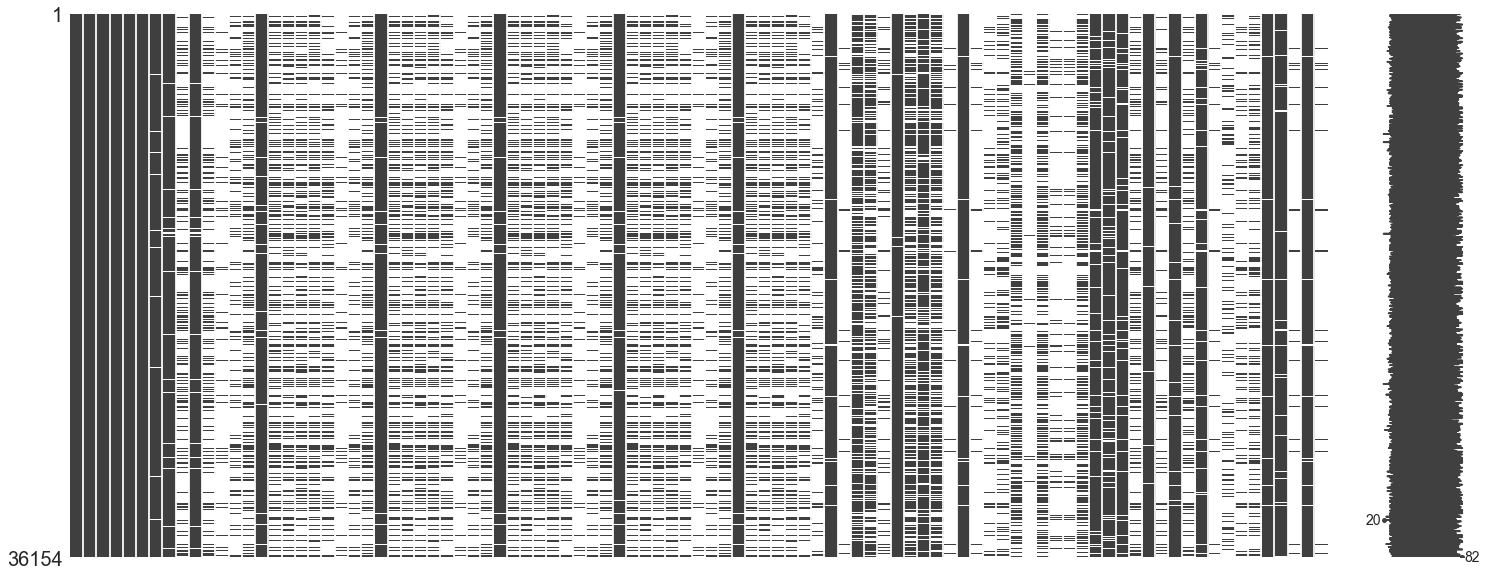

In [2]:
### Found this module to visualize missing data
### This first import dataframe after stansdardized time

from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'df5'
df = pd.read_csv(Location)


import missingno as msno

msno.matrix(df.sample(36154))

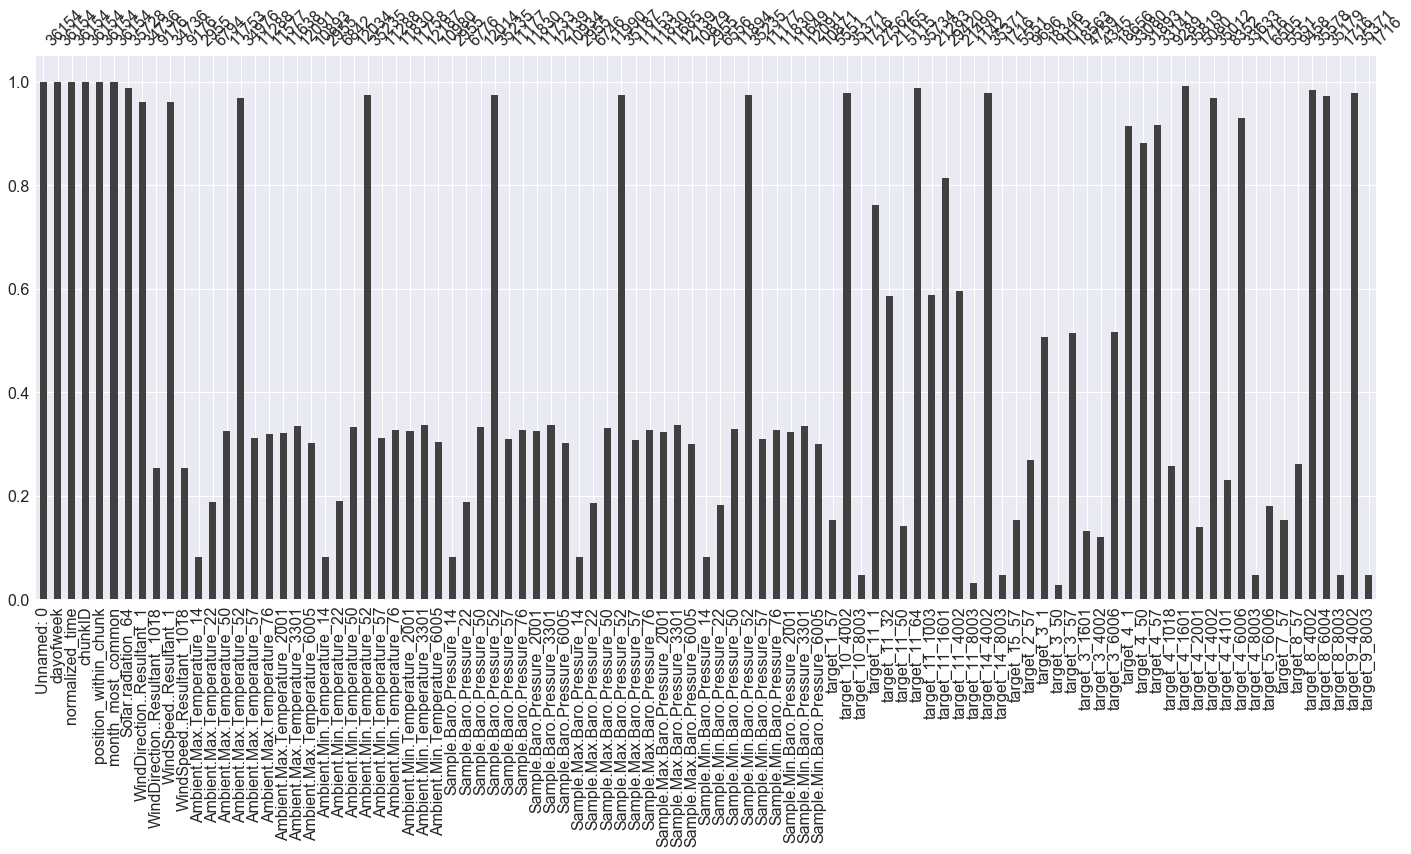

In [3]:
msno.bar(df.sample(36154))  ##Bar graph to show percentage of non-NaN data

In [4]:
df.head()

,Unnamed: 0,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,0,6,165,1,1,10,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,1,6,166,1,2,10,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,2,6,167,1,3,10,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,3,0,168,1,4,10,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,4,0,169,1,5,10,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [5]:
df1 = df.drop(df.columns[[0]], axis=1)
df1.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,6,165,1,1,10,0.01,117.0,187.0,0.3,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,6,166,1,2,10,0.01,231.0,202.0,0.5,0.6,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,6,167,1,3,10,0.01,247.0,227.0,0.5,1.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,0,168,1,4,10,0.01,219.0,218.0,0.2,1.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,0,169,1,5,10,0.01,2.0,216.0,0.2,0.3,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [6]:
df1.shape

(36154, 94)

In [7]:
print(df1.isnull().sum()) ###Total count of NaN

dayofweek                            0
normalized_time                      0
chunkID                              0
position_within_chunk                0
month_most_common                    0
Solar.radiation_64                 426
WindDirection..Resultant_1        1418
WindDirection..Resultant_1018    26978
WindSpeed..Resultant_1            1418
WindSpeed..Resultant_1018        26978
Ambient.Max.Temperature_14       33199
Ambient.Max.Temperature_22       29360
Ambient.Max.Temperature_50       24401
Ambient.Max.Temperature_52        1178
Ambient.Max.Temperature_57       24866
Ambient.Max.Temperature_76       24577
Ambient.Max.Temperature_2001     24516
Ambient.Max.Temperature_3301     24063
Ambient.Max.Temperature_6005     25261
Ambient.Min.Temperature_14       33199
Ambient.Min.Temperature_22       29312
Ambient.Min.Temperature_50       24120
Ambient.Min.Temperature_52         919
Ambient.Min.Temperature_57       24866
Ambient.Min.Temperature_76       24324
Ambient.Min.Temperature_2

In [8]:
df2 = df1.copy()

In [9]:
df2.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,6,165,1,1,10,0.01,117.0,187.0,0.3,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,6,166,1,2,10,0.01,231.0,202.0,0.5,0.6,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,6,167,1,3,10,0.01,247.0,227.0,0.5,1.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,0,168,1,4,10,0.01,219.0,218.0,0.2,1.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,0,169,1,5,10,0.01,2.0,216.0,0.2,0.3,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


One way to deal with NaNs is to remove rows with NaN. Here, I remove rows that have less than 30000 non-NaNs.

In [10]:

df2.dropna(axis =1, inplace = True, thresh=30000)
print(df1.shape)
print(df2.shape)
print ('This removed', df1.shape[1]-df2.shape[1], 'columns from the original dataframe.')

(36154, 94)
(36154, 25)
This removed 69 columns from the original dataframe.


In [11]:
df2.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindSpeed..Resultant_1,Ambient.Max.Temperature_52,Ambient.Min.Temperature_52,...,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,6,165,1,1,10,0.01,117.0,0.3,14.9,5.8,...,2.389656,2.843490,0.092022,1.693211,0.184045,0.276067,1.748424,2.138792,3.013752,5.679280
1,6,166,1,2,10,0.01,231.0,0.5,14.9,5.8,...,1.991380,3.101153,0.092022,1.941671,0.184045,0.368089,2.144120,2.722099,3.888712,7.426751
2,6,167,1,3,10,0.01,247.0,0.5,14.9,5.8,...,1.752415,3.064344,0.092022,2.521412,0.184045,0.368089,1.932469,3.110970,3.888712,7.683732
3,0,168,1,4,10,0.01,219.0,0.2,14.0,4.8,...,2.389656,3.211580,0.184045,2.374176,0.184045,0.276067,2.088907,2.041574,3.208188,4.831243
4,0,169,1,5,10,0.01,2.0,0.2,14.0,4.8,...,2.310001,3.671691,0.184045,2.466199,0.184045,0.276067,2.604232,2.138792,3.499841,4.625658


In [12]:
df3 = df2.copy()

In [13]:
print(df2.isnull().sum())  # This still leaves many Nan in some of the remaining columns

dayofweek                         0
normalized_time                   0
chunkID                           0
position_within_chunk             0
month_most_common                 0
Solar.radiation_64              426
WindDirection..Resultant_1     1418
WindSpeed..Resultant_1         1418
Ambient.Max.Temperature_52     1178
Ambient.Min.Temperature_52      919
Sample.Baro.Pressure_52         919
Sample.Max.Baro.Pressure_52     967
Sample.Min.Baro.Pressure_52     919
target_10_4002                  783
target_11_64                    420
target_14_4002                  783
target_4_1                     3074
target_4_50                    4261
target_4_57                    3013
target_4_1601                   335
target_4_4002                  1142
target_4_6006                  2521
target_8_4002                   576
target_8_6004                   975
target_9_4002                   783
dtype: int64


# This still leaves many Nan in some of the remaining columns

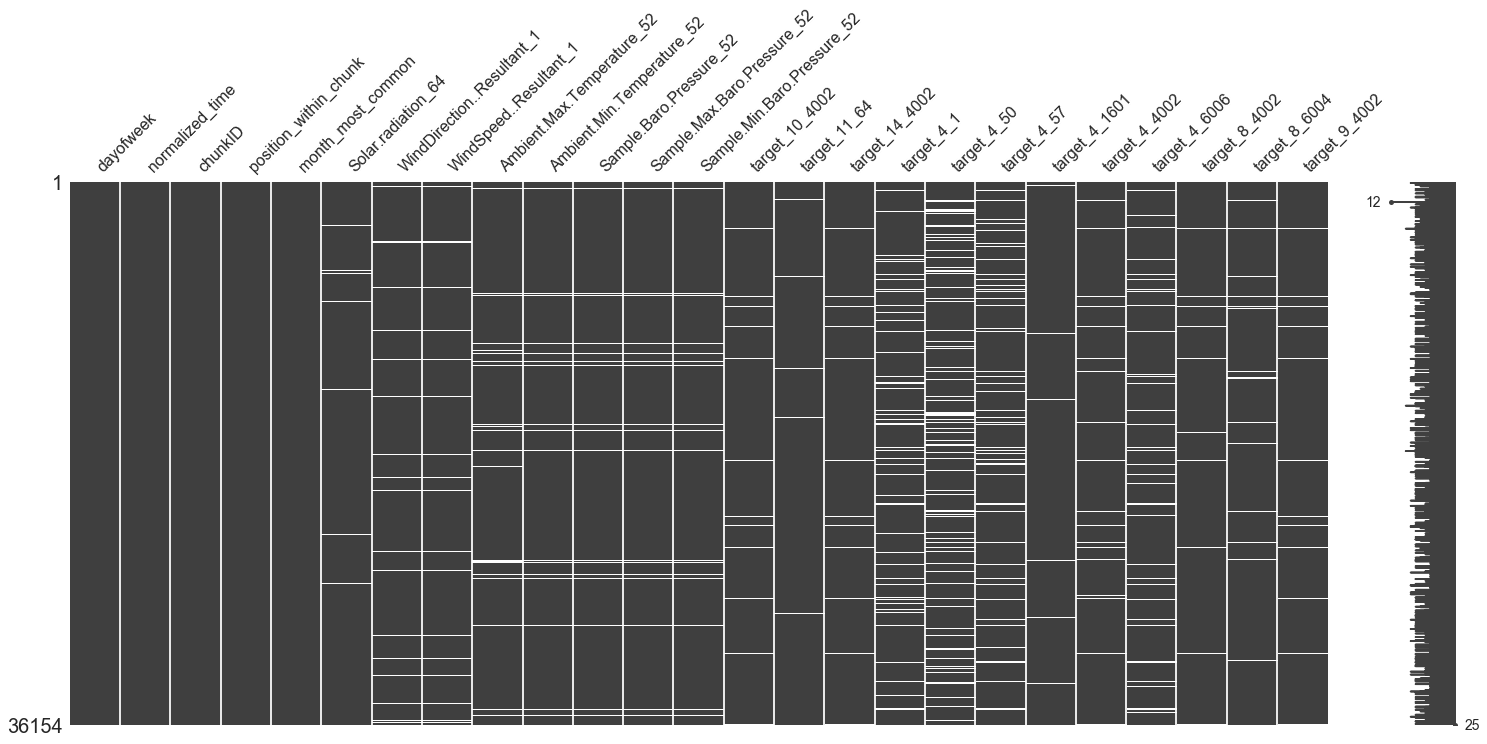

In [14]:
msno.matrix(df2.sample(36154))

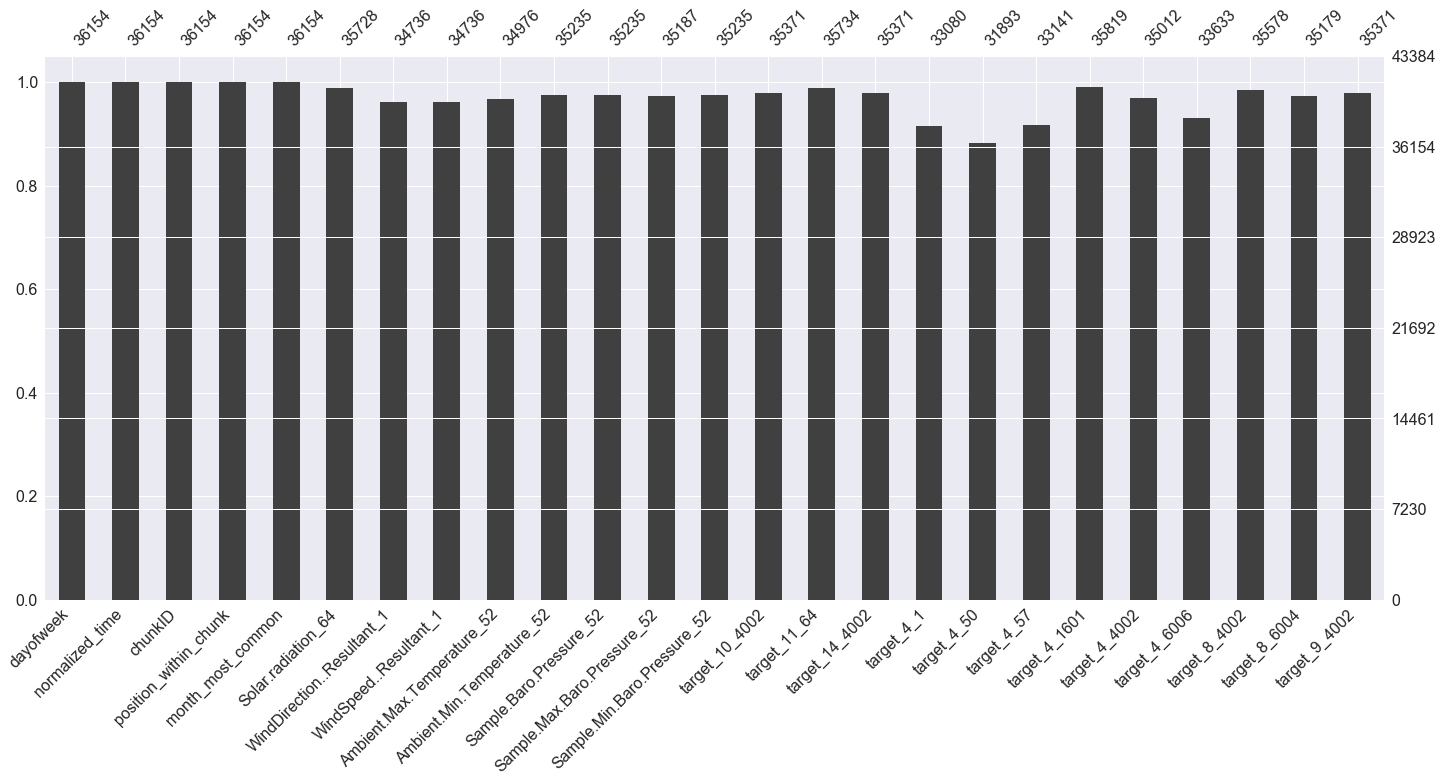

In [15]:
msno.bar(df2.sample(36154))

# Need to remove additional records with NaNs.

In [16]:
df3 = df2.copy()
df3.dropna(axis =0, inplace = True)
print(df3.shape)

(24043, 25)


In [17]:
print ('This removed', df1.shape[0]-df3.shape[0], 'records from the original dataframe.')

This removed 12111 records from the original dataframe.


# I will try to do linear regression for this reduced dataframe.

In [18]:
df3.shape

(24043, 25)

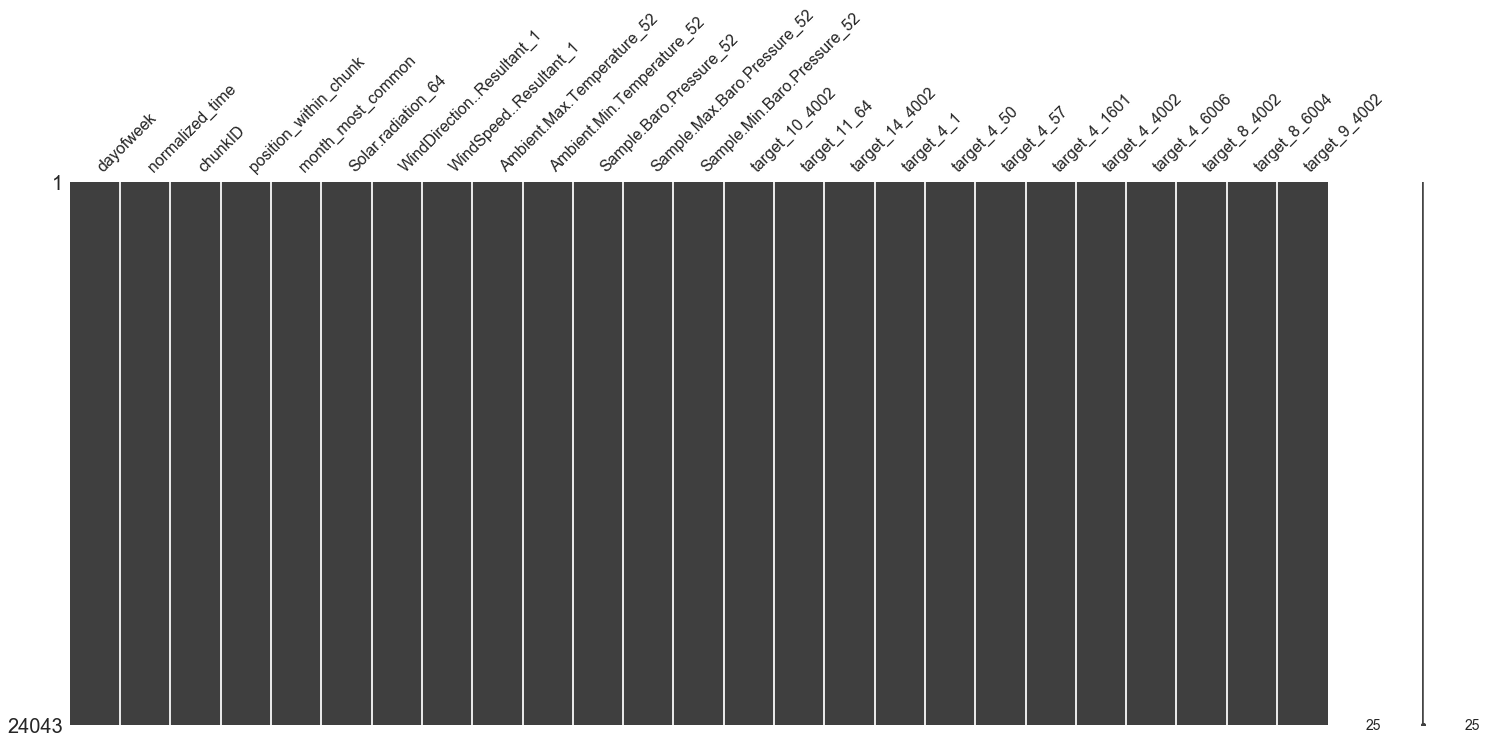

In [19]:
msno.matrix(df3.sample(24043))

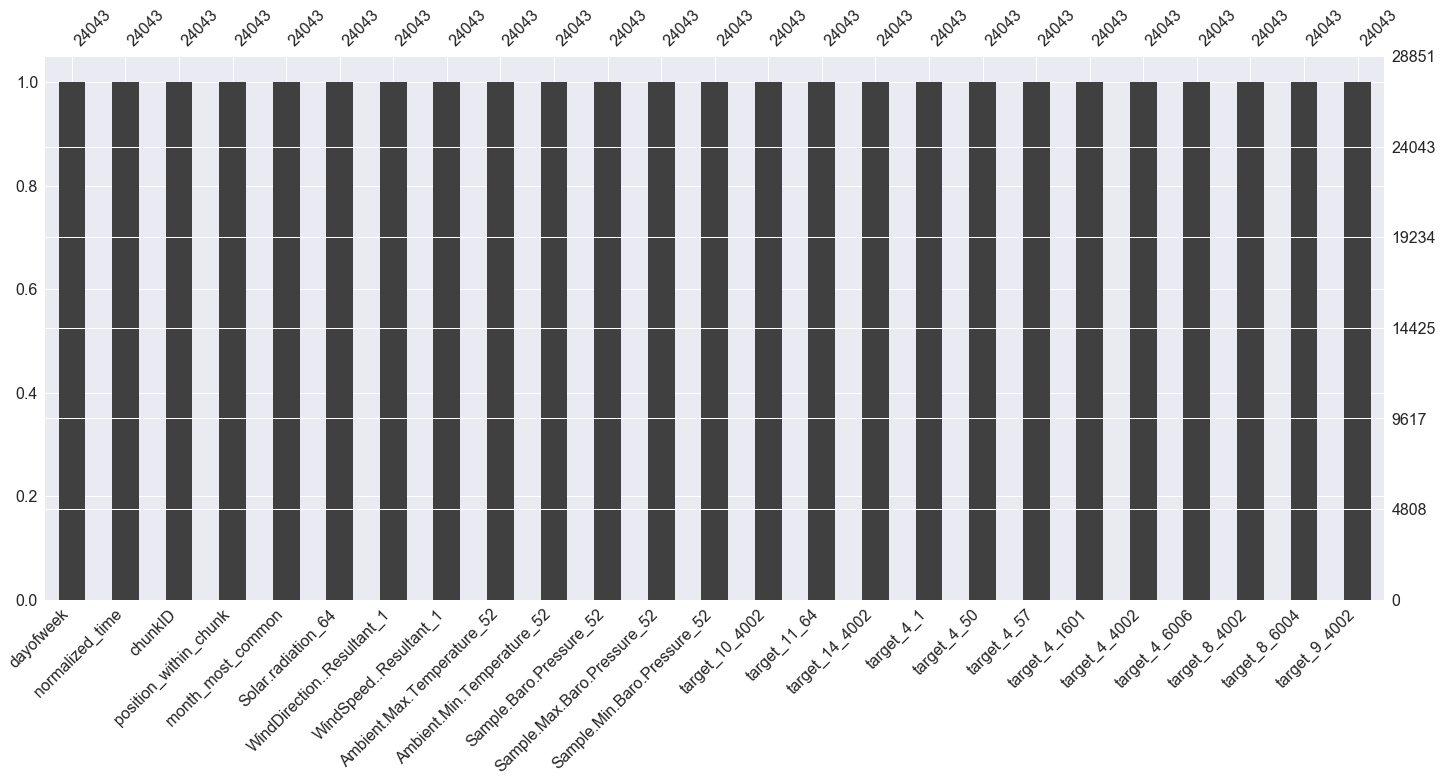

In [20]:
msno.bar(df3.sample(24043))

#Split dataframe to independent and dependent, df_input and df_targets, respectively.

In [21]:

df_input = df3.drop(df3.columns[13:25], axis=1)

In [22]:
df_targets = df3.drop(df3.columns[0:13], axis=1)

In [23]:
df_input.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindSpeed..Resultant_1,Ambient.Max.Temperature_52,Ambient.Min.Temperature_52,Sample.Baro.Pressure_52,Sample.Max.Baro.Pressure_52,Sample.Min.Baro.Pressure_52
0,6,165,1,1,10,0.01,117.0,0.3,14.9,5.8,747.0,750.0,743.0
1,6,166,1,2,10,0.01,231.0,0.5,14.9,5.8,747.0,750.0,743.0
2,6,167,1,3,10,0.01,247.0,0.5,14.9,5.8,747.0,750.0,743.0
3,0,168,1,4,10,0.01,219.0,0.2,14.0,4.8,751.0,754.0,748.0
4,0,169,1,5,10,0.01,2.0,0.2,14.0,4.8,751.0,754.0,748.0


In [24]:
df_targets.head()

,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,6.181623,0.114975,2.389656,2.843490,0.092022,1.693211,0.184045,0.276067,1.748424,2.138792,3.013752,5.679280
1,8.475833,0.114975,1.991380,3.101153,0.092022,1.941671,0.184045,0.368089,2.144120,2.722099,3.888712,7.426751
2,8.921930,0.114975,1.752415,3.064344,0.092022,2.521412,0.184045,0.368089,1.932469,3.110970,3.888712,7.683732
3,5.098246,0.114975,2.389656,3.211580,0.184045,2.374176,0.184045,0.276067,2.088907,2.041574,3.208188,4.831243
4,4.875197,0.114975,2.310001,3.671691,0.184045,2.466199,0.184045,0.276067,2.604232,2.138792,3.499841,4.625658


#Test codes for single target:

In [25]:
from sklearn.linear_model import LinearRegression
X = df_input

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#Estimate Coefficients, intercept, and mse for multiple linear regression for each targets

In [26]:
df_coeff = pd.DataFrame(['dayofweek', 'normalized_time', 'chunkID', 'position_within_chunk',
       'month_most_common', 'Solar.radiation_64', 'WindDirection..Resultant_1',
       'WindSpeed..Resultant_1', 'Ambient.Max.Temperature_52',
       'Ambient.Min.Temperature_52', 'Sample.Baro.Pressure_52',
       'Sample.Max.Baro.Pressure_52', 'Sample.Min.Baro.Pressure_52','intercept','mean square error','R Square'], columns = ['features'])

for x in range(len(df_targets.columns)):
    lm.fit(X, df_targets[df_targets.columns[x]])
    mse = np.mean((df_targets[df_targets.columns[x]] - lm.predict(X)) ** 2)
    dat = pd.DataFrame(list(zip(lm.coef_)), columns = [df_targets.columns[x]])
    dat.loc[13] = lm.intercept_
    dat.loc[14] = mse
    dat.loc[15] = lm.score(X, df_targets[df_targets.columns[x]] )
    df_coeff = df_coeff.join(dat)
print("Estimated Coeffiencts")
df_coeff

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Estimated Coeffiencts


,features,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,dayofweek,0.022040,-0.018605,0.020733,0.012582,-0.000598,0.012870,0.007304,0.001604,0.017845,-0.001570,0.007124,0.024542
1,normalized_time,0.000351,-0.000227,0.000298,0.000900,-0.000148,0.001166,0.000143,-0.000264,0.001839,0.000094,0.000264,0.000420
2,chunkID,-0.000277,0.000391,-0.000347,-0.000734,-0.000052,-0.000302,-0.000295,-0.000227,-0.000379,-0.000136,-0.000333,-0.000306
3,position_within_chunk,-0.000328,0.000256,-0.000718,-0.001169,0.000073,-0.001650,-0.000163,0.000144,-0.002253,-0.000206,-0.000331,-0.000531
4,month_most_common,0.015682,-0.037300,-0.024275,-0.042801,-0.002535,-0.044017,-0.004743,0.012405,-0.034551,-0.004785,-0.007987,0.004928
5,Solar.radiation_64,-0.041084,0.715160,-0.852473,-0.153008,0.241641,-0.330146,0.254981,0.121253,-0.337219,-0.041033,-0.126879,-0.308554
6,WindDirection..Resultant_1,0.000051,-0.001763,-0.000445,-0.000221,0.000140,-0.000125,0.000391,-0.000246,-0.000253,0.000057,-0.000075,-0.000080
7,WindSpeed..Resultant_1,-0.101769,0.073856,-0.150203,-0.045709,-0.002349,-0.039411,0.005757,0.014691,-0.017413,-0.023181,-0.030022,-0.130856
8,Ambient.Max.Temperature_52,0.010400,0.011722,0.026435,0.000831,0.001507,0.008670,0.011372,0.003359,0.014702,-0.004508,0.002949,0.017047
9,Ambient.Min.Temperature_52,-0.037275,0.030240,-0.046762,0.010030,-0.004018,0.003071,-0.015609,-0.000971,0.004700,-0.003083,-0.009775,-0.045375


In [27]:
from pandas.stats.api import ols
import statsmodels.api as sm
X = sm.add_constant(X)
res = sm.OLS(df_targets.target_10_4002,X)
result = res.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         target_10_4002   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     306.9
Date:                Wed, 02 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:09:49   Log-Likelihood:                -29195.
No. Observations:               24043   AIC:                         5.842e+04
Df Residuals:                   24029   BIC:                         5.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

In [28]:
for x in range(len(df_targets.columns)):
    X = sm.add_constant(X)
    res = sm.OLS(df_targets[df_targets.columns[x]],X)
    result = res.fit()
    print(df_targets.columns[x])
    print(result.summary())
    print('*******************************************************')
    

target_10_4002
                            OLS Regression Results                            
Dep. Variable:         target_10_4002   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     306.9
Date:                Wed, 02 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:09:59   Log-Likelihood:                -29195.
No. Observations:               24043   AIC:                         5.842e+04
Df Residuals:                   24029   BIC:                         5.853e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
con

Lasso Regression to eliminate non-predicative variables.
    


In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd



# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_lasso = pd.DataFrame()

    # Create a column of feature names
    
    df_lasso['Feature Name'] = df_input.columns
    df_lasso.loc[13] = 'score'

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)

        # Fit the lasso regression
        lasso.fit(X,Y)
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        var = np.append(lasso.coef_, lasso.score(X,Y))
        df_lasso[column_name] = var
       
                           
    
    df_lasso.to_csv('lasso.csv',encoding='utf-8', index=False)
    # Return the datafram    
    return df_lasso


In [30]:
for x in range(len(df_targets.columns)):
    X = df_input
    Y = df_targets[df_targets.columns[x]]
    print(df_targets.columns[x])
    # Fit the lasso regression
    print(lasso([ .001,.01,.1, .5, 1, 5, 10]))
    print('*******************************************************')  
    

target_10_4002
                   Feature Name  Alpha = 0.001000  Alpha = 0.010000  \
0                     dayofweek          0.021814          0.019606   
1               normalized_time          0.000353          0.000365   
2                       chunkID         -0.000277         -0.000275   
3         position_within_chunk         -0.000327         -0.000334   
4             month_most_common          0.015599          0.014728   
5            Solar.radiation_64         -0.031309         -0.000000   
6    WindDirection..Resultant_1          0.000054          0.000072   
7        WindSpeed..Resultant_1         -0.101902         -0.101113   
8    Ambient.Max.Temperature_52          0.010219          0.009176   
9    Ambient.Min.Temperature_52         -0.037147         -0.036141   
10      Sample.Baro.Pressure_52         -0.010361         -0.005439   
11  Sample.Max.Baro.Pressure_52          0.004240          0.000882   
12  Sample.Min.Baro.Pressure_52          0.000000         -0.0

In [31]:

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd



# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df_ridge = pd.DataFrame()

    # Create a column of feature names
    
    df_ridge['Feature Name'] = df_input.columns
    df_ridge.loc[13] = 'score'

    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge = Ridge(alpha=alpha)

        # Fit the lasso regression
        ridge.fit(X,Y)
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        var = np.append(ridge.coef_, ridge.score(X,Y))
        df_ridge[column_name] = var
       
                           
    
    df_ridge.to_csv('ridge.csv',encoding='utf-8', index=False)
    # Return the datafram    
    return df_ridge

In [32]:
for x in range(len(df_targets.columns)):
    X = df_input
    Y = df_targets[df_targets.columns[x]]
    print(df_targets.columns[x])
    # Fit the lasso regression
    print(ridge([ 1e-4, 1e-3,1e-2, 1, 5, 10, 20,100,1000]))
    print('*******************************************************')  
    

target_10_4002
                   Feature Name  Alpha = 0.000100  Alpha = 0.001000  \
0                     dayofweek          0.022040          0.022040   
1               normalized_time          0.000351          0.000351   
2                       chunkID         -0.000277         -0.000277   
3         position_within_chunk         -0.000328         -0.000328   
4             month_most_common          0.015682          0.015682   
5            Solar.radiation_64         -0.041084         -0.041084   
6    WindDirection..Resultant_1          0.000051          0.000051   
7        WindSpeed..Resultant_1         -0.101769         -0.101769   
8    Ambient.Max.Temperature_52          0.010400          0.010400   
9    Ambient.Min.Temperature_52         -0.037275         -0.037275   
10      Sample.Baro.Pressure_52         -0.011465         -0.011465   
11  Sample.Max.Baro.Pressure_52          0.004740          0.004740   
12  Sample.Min.Baro.Pressure_52          0.000654          0.0

In [33]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np

X = df_input
Y = df_targets[df_targets.columns[0]]




names = df_input.columns
rf = RandomForestRegressor(n_estimators = 100, oob_score = True,n_jobs = 1,random_state =1)
rf.fit(X, Y)
df_rf = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'feature importance'])
df_rf
print ("R2 : ", r2_score(Y,rf.oob_prediction_))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

,features,feature importance
0,dayofweek,0.021317
1,normalized_time,0.099901
2,chunkID,0.072271
3,position_within_chunk,0.097030
4,month_most_common,0.034821
5,Solar.radiation_64,0.039048
6,WindDirection..Resultant_1,0.170108
7,WindSpeed..Resultant_1,0.167328
8,Ambient.Max.Temperature_52,0.055828
9,Ambient.Min.Temperature_52,0.162101


R2 :  0.664373665313


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np



# Create a function called rf,
def randomforest_leaf(sample_leaf_options):
    # Create an empty data frame
    df_rf = pd.DataFrame()

    # Create a column of feature names

    df_rf['Feature Name'] = df_input.columns
    df_rf.loc[13] = 'score'
    df_rf.loc[14] = 'n_features_'
    

   # For each alpha value in the list of alpha values,
    for leaf_size in sample_leaf_options :
            # Create a random forest regression,
        rf = RandomForestRegressor(n_estimators = 500, oob_score = True,n_jobs = 1,random_state =1, max_features = "auto", min_samples_leaf = leaf_size)

            # Fit the lasso regression
        rf.fit(X,Y)
            # Create a column name for that leaf size value
        column_name = 'Leaf Size %f' % leaf_size

            # Create a column of coefficient values
        var1 = np.append(rf.feature_importances_, r2_score(Y,rf.oob_prediction_))
        var = np.append(var1,rf.n_features_)
        df_rf[column_name] = var

        # Return the dataframe    
    return df_rf


In [35]:
X = df_input
Y = df_targets[df_targets.columns[0]]
randomforest_leaf([1,5,10,50,100,200,500])

,Feature Name,Leaf Size 1.000000,Leaf Size 5.000000,Leaf Size 10.000000,Leaf Size 50.000000,Leaf Size 100.000000,Leaf Size 200.000000,Leaf Size 500.000000
0,dayofweek,0.021075,0.020820,0.020185,0.016878,0.010558,0.010200,0.001794
1,normalized_time,0.098687,0.080451,0.066714,0.038688,0.024357,0.008230,0.000360
2,chunkID,0.072399,0.077521,0.076119,0.035139,0.018279,0.001792,0.000206
3,position_within_chunk,0.096898,0.077829,0.063483,0.015372,0.005008,0.000371,0.000135
4,month_most_common,0.036182,0.037543,0.038491,0.034031,0.028731,0.009308,0.008993
5,Solar.radiation_64,0.037830,0.026843,0.023135,0.015838,0.013380,0.010080,0.007380
6,WindDirection..Resultant_1,0.169858,0.172425,0.179189,0.227672,0.251954,0.265825,0.112644
7,WindSpeed..Resultant_1,0.168619,0.187656,0.214073,0.292805,0.319617,0.343239,0.418545
8,Ambient.Max.Temperature_52,0.055644,0.053801,0.045110,0.022343,0.012275,0.005235,0.001495
9,Ambient.Min.Temperature_52,0.163830,0.194220,0.212747,0.274879,0.305038,0.342626,0.448092


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, average_precision_score, r2_score
import numpy as np



# Create a function called rf,
def randomforest_nestimators(sample_nestimators):
    # Create an empty data frame
    df_rf = pd.DataFrame()

    # Create a column of feature names

    df_rf['Feature Name'] = df_input.columns
    df_rf.loc[13] = 'score'
    df_rf.loc[14] = 'n_features_'
    

   # For each alpha value in the list of alpha values,
    for nestimators in sample_nestimators :
            # Create a random forest regression,
        rf = RandomForestRegressor(n_estimators = nestimators, oob_score = True,n_jobs = 1,random_state =1, max_features = "auto", min_samples_leaf = 50)

            # Fit the rf regression
        rf.fit(X,Y)
            # Create a column name for that n estimator value
        column_name = 'n estimators %f' % nestimators

            # Create a column of coefficient values
        var1 = np.append(rf.feature_importances_, r2_score(Y,rf.oob_prediction_))
        var = np.append(var1,rf.n_features_)
        df_rf[column_name] = var

        # Return the datafram    
    return df_rf


In [39]:
X = df_input
Y = df_targets[df_targets.columns[0]]
randomforest_nestimators([1,5,50,500,1000,5000])

/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


,Feature Name,n estimators 1.000000,n estimators 5.000000,n estimators 50.000000,n estimators 500.000000,n estimators 1000.000000,n estimators 5000.000000
0,dayofweek,0.013823,0.018631,0.014625,0.016878,0.017625,0.017654
1,normalized_time,0.046986,0.029533,0.037532,0.038688,0.038203,0.037382
2,chunkID,0.033988,0.042964,0.034543,0.035139,0.034915,0.035501
3,position_within_chunk,0.020253,0.015239,0.016213,0.015372,0.015105,0.015202
4,month_most_common,0.020222,0.025163,0.035622,0.034031,0.033816,0.033268
5,Solar.radiation_64,0.015072,0.016175,0.017434,0.015838,0.015424,0.015567
6,WindDirection..Resultant_1,0.232737,0.230254,0.228706,0.227672,0.227859,0.228236
7,WindSpeed..Resultant_1,0.285023,0.294159,0.295125,0.292805,0.292785,0.293051
8,Ambient.Max.Temperature_52,0.015204,0.020501,0.023999,0.022343,0.023196,0.023157
9,Ambient.Min.Temperature_52,0.264689,0.276789,0.270992,0.274879,0.275164,0.275236


#Split dataframe to test and training set.

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, df_targets, test_size=0.2, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(19234, 13)
(4809, 13)
(19234, 12)
(4809, 12)


/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Fit a model X_train, and calculate MSE with Y_train: target_10_4002    0.644409
target_11_64      0.523635
target_14_4002    0.652537
target_4_1        1.038694
target_4_50       0.075218
target_4_57       0.988339
target_4_1601     0.397299
target_4_4002     0.252228
target_4_6006     1.077296
target_8_4002     0.084597
target_8_6004     0.257715
target_9_4002     0.634511
dtype: float64
Fit a model X_train, and calculate MSE with X_test, Y_test: target_10_4002    0.743416
target_11_64      0.531597
target_14_4002    0.654641
target_4_1        1.108419
target_4_50       0.068369
target_4_57       1.101244
target_4_1601     0.492753
target_4_4002     0.241431
target_4_6006     1.075600
target_8_4002     0.081728
target_8_6004     0.252056
target_9_4002     0.721067
dtype: float64


In [42]:
df_coeff_split = pd.DataFrame(['Training MSE', 'Testing MSE'], columns = ['Mean Standard Error'])

for x in range(len(df_targets.columns)):
    lm.fit(X_train, Y_train[Y_train.columns[x]])
    pred_train = lm.predict(X_train)
    pred_test = lm.predict(X_test)
    mse_train = np.mean((Y_train[Y_train.columns[x]] - lm.predict(X_train)) ** 2)
    mse_test = np.mean((Y_test[Y_test.columns[x]] - lm.predict(X_test)) ** 2)
    col = pd.DataFrame([mse_train, mse_test], columns = [df_targets.columns[x]])

    
    df_coeff_split = df_coeff_split.join(col)
print("MSE_Split")
df_coeff_split

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

MSE_Split


,Mean Standard Error,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Training MSE,0.644409,0.523635,0.652537,1.038694,0.075218,0.988339,0.397299,0.252228,1.077296,0.084597,0.257715,0.634511
1,Testing MSE,0.743416,0.531597,0.654641,1.108419,0.068369,1.101244,0.492753,0.241431,1.075600,0.081728,0.252056,0.721067


# K Fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=4)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score")
df_kfold

KFold Score


,KFolds Score,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.676797,0.534285,0.674853,1.105770,0.075904,1.040663,0.429042,0.253879,1.128857,0.087639,0.264356,0.668118
2,STD,0.162468,0.028888,0.035151,0.099811,0.025545,0.125871,0.105601,0.022251,0.135082,0.020310,0.025695,0.126386


# K Fold Cross Validation with ShuffleSplit

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=10)
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=cv)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score ShuffleSplit")
df_kfold

KFold Score ShuffleSplit


,KFolds Score,target_10_4002,target_11_64,target_14_4002,target_4_1,target_4_50,target_4_57,target_4_1601,target_4_4002,target_4_6006,target_8_4002,target_8_6004,target_9_4002
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.656442,0.527476,0.648417,1.057076,0.075232,0.986208,0.418575,0.246915,1.045681,0.084784,0.256497,0.641894
2,STD,0.030609,0.004419,0.013758,0.045140,0.003583,0.042906,0.049235,0.015167,0.033174,0.001869,0.002953,0.021599


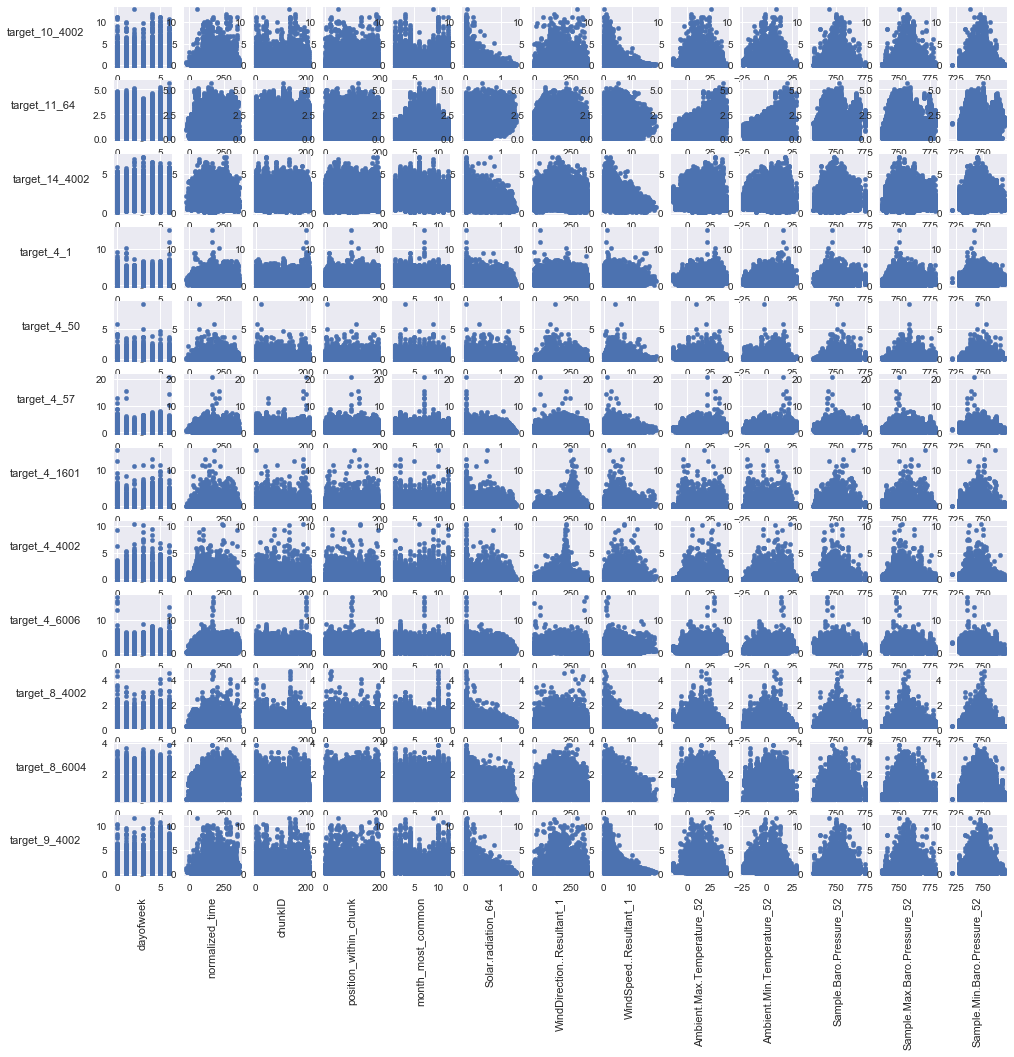

In [45]:
fig, axes = plt.subplots(nrows=12, ncols=13, sharex=False, sharey=False, squeeze=False,figsize=(16,16))
axes_list = [item for sublist in axes for item in sublist] 
axes_list2 = [item for sublist in axes for item in sublist]
input = range(13)
targ = range(13,25)
for k in range(13,25):
    for j in range(13):
        ax = axes_list.pop(0)
        df3.plot(df3.columns[j], df3.columns[k], ax=ax,kind='scatter' )
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50

        
for x in range (0,11):
    for y in range (1,13):
        ax = axes[x,y] # the left boundary
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)

for y in range (1,13):
        ax = axes[11,y] # the left boundary
        ax.yaxis.label.set_visible(False)
        


In [46]:
from pandas import read_csv
import numpy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
values = df3.values
X = values[:,0:12]
y = values[:,12]
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())


0.227633721462


/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
